# Read In Dataset ([RCV1](http://scikit-learn.org/stable/datasets/rcv1.html))
The RCV1 dataset is included in scikit learn by default.

In [39]:
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()

## Dataset Attributes
   1. __data__ - a scipy [compressed row storage (CSR) sparce matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html). Non-zero values are cosinne-normalized, log TF-IDF vectors. The shape is (num_samples, num_features)
   2. __target__ - a scipy CSR sparse matrix. Maps each sample to relavent categories (sometimes refered to as labels). The shape is (num_samples, num_categories).
   3. __sample_id__ - a [numpy n-dimensional array](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html) (ndarray) associating each sample's ID to its sample number
   4. __target_names__ - a ndarray of target names (can be thought of as topics or categories) corresponding to the category mapping in __(2)__. Each sample belongs to n categories, where 1 $\le$ n $\le$ 13.
   5. __description__ - a description of the dataset
   
The shape attribute gives the dimensions of the matrix.

In [40]:
print ('data:')
print(f'      shape: {rcv1.data.shape}')
print(f'  data type: {rcv1.data.dtype}')
print(f' array type: {type(rcv1.data)}')
print(f'    nonzero: {round((rcv1.data.count_nonzero() / (rcv1.data.shape[0] * rcv1.data.shape[1])) * 100, 4)}%')

print()
print('target:')
print(f'      shape: {rcv1.target.shape}')
print(f'  data type: {rcv1.target.dtype}')
print(f' array type: {type(rcv1.target)}')
print(f'    nonzero: {round((rcv1.target.count_nonzero() / (rcv1.target.shape[0] * rcv1.target.shape[1])) * 100, 4)}%')

print()
print('sample_id:')
print(f'      shape: {rcv1.sample_id.shape}')
print(f'  data type: {type(rcv1.sample_id[3])}')
print(f' array type: {type(rcv1.sample_id)}')

print()
print('target_names:')
print(f'      shape: {rcv1.target_names.shape}')
print(f'  data type: {type(rcv1.target_names[3])}')
print(f' array type: {type(rcv1.target_names)}')

data:
      shape: (804414, 47236)
  data type: float64
 array type: <class 'scipy.sparse.csr.csr_matrix'>
    nonzero: 0.1603%

target:
      shape: (804414, 103)
  data type: uint8
 array type: <class 'scipy.sparse.csr.csr_matrix'>
    nonzero: 3.1463%

sample_id:
      shape: (804414,)
  data type: <class 'numpy.uint32'>
 array type: <class 'numpy.ndarray'>

target_names:
      shape: (103,)
  data type: <class 'str'>
 array type: <class 'numpy.ndarray'>


# Document Classification
## [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)
A supervise learning algorithm based on using Bayes' theorem. This method assumes independence between each pair of features.

Bayes Theorem:
\begin{equation}
P(y | x_1, . . ., x_n) = \frac{P(y) P(x_1, . . ., x_n | y)} {P(x_1, . . ., x_n)} \hspace{3.6cm} (1)
\end{equation}

This can be further simplified by using the assumption that each pair of features is independent, shown in eq 2.1. Then since $P(x_1, ..., x_n) $ is constant with respect to each input we can use the proportionlity in eq 2.2.

\begin{align}
P(y | x_1, . . ., x_n) &= \frac{P(y) \prod_{i = 1}^{n} P(x_1, . . ., x_n | y)} {P(x_1, . . ., x_n)} \hspace{3cm}(2.1)\\
                 &\propto P(y) \prod_{i = 1}^{n} P(x_1, . . ., x_n | y)   \hspace{3.5cm}(2.2)
\end{align}

This gives us our classification rule, shown in eq 3.

\begin{equation}
\hat{y} = arg \max_y P(y) \prod_{i=1}^{n} P(x_i | y) \hspace{5.4cm} (3)
\end{equation}

SciKit Learn supports several Naive Bayes implimentations. 
1. __Gaussian Naive Bayes__ - In this implementation the likelihood of the features is assumed to be Gaussian. Gussian distributions are more commonly reffered to as the normal distribution or bell curve. This class does not support sparse matricies.
2. __Multinomial Naive Bayes__ - In this implementation the likelihood of the features is assumed to follow a multinomial distribution. Typically used in text classification. This class does support sparse matricies.
3. __Bernoulli Naive Bayes__ - This implimentaiton assumes the data follows multivariate Bernoulli distributions. Multiple features are allowed but each one is assumed to be a binary variable.

Because of these restrictions only Multinomial Naive Bayes will be appropriate for the RCV1 dataset. There is an additional step required because Naive Bayes does not typically predict multilple labels. This means an additional strategy must be implemented. One commonly used startegy is known as one-vs-all ([one-vs-the-rest](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) in scikit learn). This strategy works by using one classifier for each label.

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

multinomial_clf = OneVsRestClassifier(MultinomialNB(), classes_=rcv1.target_names)

multinomial_clf.fit(rcv1.data, rcv1.target)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1)

## Testing
When testing a machine learning algorithm it is difficult to determine how a classifier performs by hand, so several metrics are commonly used to evaluate their performance.

1. __accuracy__ - The percentage of labels predicted correctly.
+ __precision__ - The ratio of true positives to true positives and false positives.
+ __recall__ - The ratio of true positives to true positives and false negatives.
+ __average precision__ - The weighted mean of the precision achieved at eaach recall threshold.

Information on additional averaging methods can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score). 

Shape y_test (402207, 103); shape prediction (402207, 103)


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.51
Accuracy: 0.3418


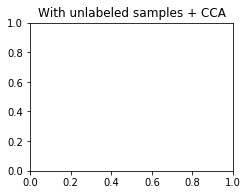

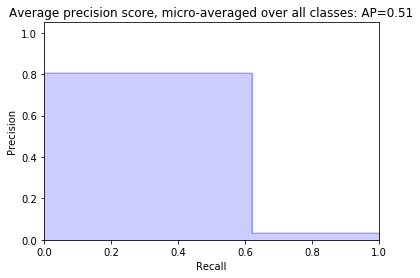

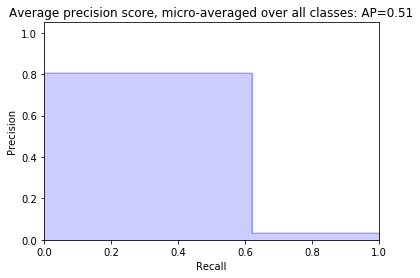

In [60]:
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.model_selection import KFold

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

kf = KFold(n_splits=2)
X_train, X_test
y_train, y_test
for train_index, test_index in kf.split(rcv1.data):
    X_train, X_test = rcv1.data[train_index], rcv1.data[test_index]
    y_train, y_test = rcv1.target[train_index],rcv1.target[test_index]

    split_clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-2)
    split_clf.fit(X_train, y_train)
    prediction = split_clf.predict(X_test)

    accuracy = accuracy_score(y_test, prediction)
    avg_precision = average_precision_score(y_test.toarray(), prediction.toarray())
    
    precision = {}
    recal = {}
    average_precision = {}
    pred_arr = prediction.toarray()
    y_test_arr = y_test.toarray()
    # Calculate for each class
    for i in range(rcv1.target.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(y_test_arr[:, i], pred_arr[:, i])
        average_precision[i] = average_precision_score(y_test_arr[:, i], pred_arr[:,i])
        
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_arr.ravel(), pred_arr.ravel())
    average_precision["micro"] = average_precision_score(y_test_arr, pred_arr, average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print(f'Accuracy: {round(accuracy,4)}')
    
    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))
    plt.show()
    break

# Notes for tomorrow

## SciKit

+ [multiclass and multilabel algorithms](http://scikit-learn.org/stable/modules/multiclass.html)
+ [precision-recall](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)
+ [average_precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score)
+ [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve)
+ [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

## Markdown

+ [math](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
+ [general](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
